In [59]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from latex import set_size



plt.style.use("tex")
sns.set_palette("colorblind")

datadir = "../data/"
figdir = "../figures/"

R_atlantic = np.sqrt(9.81*1000)/1e-4
R_baltic = np.sqrt(9.81*30)/1e-4

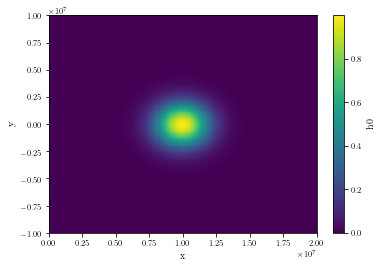

In [3]:
initial = xr.open_dataset(datadir + "H_init_cond.nc")
initial.h0.plot()

In [32]:
data_baltic = xr.open_dataset(datadir + "h_baltic.nc")
data_atlantic = xr.open_dataset(datadir + "h_atlantic.nc")

6.018518518518519
6.324555320336759
1.0069444444444444
1.0954451150103321


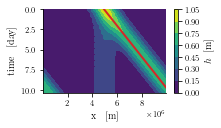

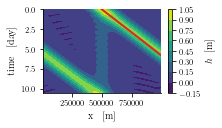

In [65]:
eq_atlantic = data_atlantic.sel(y=0, method="nearest")
eq_baltic = data_baltic.sel(y=0, method="nearest")

def f(t):
    return 8.7e4*(t+5.7)

def f_1(t):
    return 5.2e5*(t + 9.5)

print(5.2e5/24/60/60)
print(np.sqrt(0.04*1000))


print(8.7e4/24/60/60)
print(np.sqrt(0.04*30))

fig, ax = plt.subplots(1, 1, figsize=set_size(width=221))

c = ax.contourf(eq_atlantic.x, eq_atlantic.time/24, eq_atlantic.h)
ax.plot(f_1(eq_atlantic.time/24), eq_atlantic.time/24,
        color="tab:red",
        linewidth=2
       )
ax.invert_yaxis()
ax.set_xlim(eq_atlantic.x.min(), eq_atlantic.x.max())
ax.set_xlabel(r"x $\,$ [m]")
ax.set_ylabel(r"time $\,$ [day]")

fig.colorbar(c, label=r"$h \, $ [m]")

sns.despine(fig=fig)
fig.tight_layout()
fig.savefig(figdir + "hovmuller_atlantic.pdf", format="pdf", bbox_inches="tight", dpi=600)

fig, ax = plt.subplots(1, 1, figsize=set_size(width=221))

c = ax.contourf(eq_baltic.x, eq_baltic.time/24, eq_baltic.h)
ax.plot(f(eq_baltic.time/24), eq_baltic.time/24,
        color="tab:red",
        linewidth=2
       )
ax.invert_yaxis()
ax.set_xlim(eq_baltic.x.min(), eq_baltic.x.max())
ax.set_xlabel(r"x $\,$ [m]")
ax.set_ylabel(r"time $\,$ [day]")

fig.colorbar(c, label=r"$h \, $ [m]")


sns.despine(fig=fig)
fig.tight_layout()
fig.savefig(figdir + "hovmuller_baltic.pdf", format="pdf", bbox_inches="tight", dpi=600)

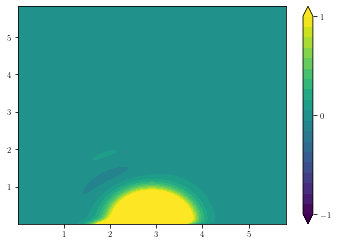

In [57]:
final = data.isel(time=-1)

levels = np.linspace(-1, 1, 20)
levels1=[levels[0], 0, levels[-1]]

fig, ax = plt.subplots(1, 1)
c = ax.contourf(final.x/R, final.y/R, final.h*10,
            levels=levels,
            extend="both")
fig.colorbar(c, ticks=levels1)


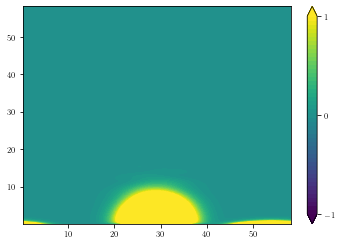

In [99]:
Nt = 50

x = data.x
y = data.y
z = data.h

levels = np.linspace(-1, 1, Nt)
levels1=[levels[0], 0, levels[-1]]

fig, ax = plt.subplots(1, 1)
#ax.set_ylim(0, max(data.y)/4)

cont = plt.contourf(x/R, y/R, data.h.isel(time=0)*10,
                    levels=levels,
                    #cmap=plt.get_cmap("coolwarm"),
                    extend="both"
                   )
plt.colorbar(ticks=levels1)

def animate(i):
    global cont
    z = data.h.isel(time=i)
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x/R, y/R, z*10,
                        levels=levels,
                        #cmap=plt.get_cmap("coolwarm"),
                        extend="both"
                       )
    #plt.title('t = %i:  %.2f' % (i,z[5,5]))
    return cont

anim = animation.FuncAnimation(fig, animate, frames=Nt, repeat=False)
#anim.save(figdir + "kelvin_baltic.mp4", writer=animation.FFMpegWriter())

1.0069444444444444
1.0954451150103321


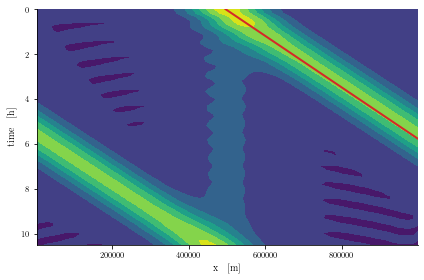

In [30]:
eq = data.sel(y=0, method="nearest")

def f(t):
    return 8.7e4*(t+5.7)

print(8.7e4/24/60/60)
print(np.sqrt(0.04*30))

fig, ax = plt.subplots(1, 1)#, figsize=set_size(width=221))

ax.contourf(eq.x, eq.time/24, eq.h)
ax.plot(f(eq.time/24), eq.time/24,
        color="tab:red",
        linewidth=2
       )
ax.invert_yaxis()
ax.set_xlim(eq.x.min(), eq.x.max())
ax.set_xlabel(r"x $\,$ [m]")
ax.set_ylabel(r"time $\,$ [h]")

sns.despine(fig=fig)
fig.tight_layout()
#fig.savefig(figdir + "hovmuller_baltic.pdf", format="pdf", bbox_inches="tight")

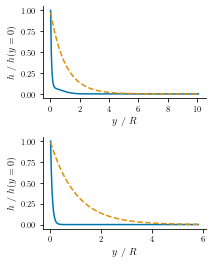

In [63]:
seldata_atlantic = data_atlantic.sel(time=80, method="nearest")
seldata_baltic = data_baltic.sel(time=80, method="nearest")


xmax_atlantic = seldata_atlantic.where(seldata_atlantic==seldata_atlantic.where(seldata_atlantic.x > 6e6).max(), drop=True).squeeze().x.values
xmax_baltic = seldata_baltic.where(seldata_baltic==seldata_baltic.where(seldata_baltic.x > 6e5).max(), drop=True).squeeze().x.values


fig, ax = plt.subplots(2, 1, figsize=set_size(width=221, subplots=(2, 1)))

wave_atlantic = data_atlantic.sel(x=xmax_atlantic, time=80, method="nearest").h
wave_baltic = data_baltic.sel(x=xmax_baltic, time=80, method="nearest").h

ax[0].plot(data_atlantic.y/R_atlantic, wave_atlantic/wave_atlantic.isel(y=0))
ax[0].plot(data_atlantic.y/R_atlantic, np.exp(-data_atlantic.y/R_atlantic), linestyle="dashed")
ax[0].set_xlabel(r"$y$ / $R$")
ax[0].set_ylabel(r"$h$ / $h(y=0)$")

ax[1].plot(data_baltic.y/R_baltic, wave_baltic/wave_baltic.isel(y=0))
ax[1].plot(data_baltic.y/R_baltic, np.exp(-data_baltic.y/R_baltic), linestyle="dashed")
ax[1].set_xlabel(r"$y$ / $R$")
ax[1].set_ylabel(r"$h$ / $h(y=0)$")

sns.despine(fig=fig)
fig.tight_layout()
fig.savefig(figdir + "slice.pdf", format="pdf", bbox_inches="tight")